# Image classification with Support Vector Machine (SVM) using HOG features

## Aim is to detect the presence of large ships in satellite image
```
Dataset
Image chips from satellite imagery
2800 (80x80) RGB images labelled with either a “ship” or “no-ship”
Pixel value data for each 80x80 image – stored as a list of 19200 integers
```

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
import glob


## Input image

sfbay_1.png
(1777, 2825, 4)


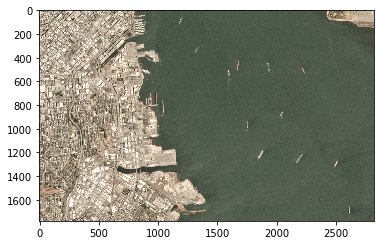

In [14]:
src_image_file =  './scenes/sfbay_1.png'
data = plt.imread(src_image_file)
print(data.shape)
plt.imshow(data)
plt.show()

### Read image data.  
#### Each image is chipped from the inout image of resolution 80*80

In [40]:
data_path = './shipsnet/'

file_names = glob.glob(data_path+'*')
labels = []
image_data = []
for file in file_names:
    labels.append(file.split('/')[-1][0])
    image_data.append(plt.imread(file))
labels = np.array(labels)
image_data = np.array(image_data)

print('Loaded images data in numpy array of shape: ', image_data.shape)
print('Loaded labels data in numpy array of shape: ', labels.shape)


Loaded images data in numpy array of shape:  (2800, 80, 80, 3)
Loaded labels data in numpy array of shape:  (2800,)


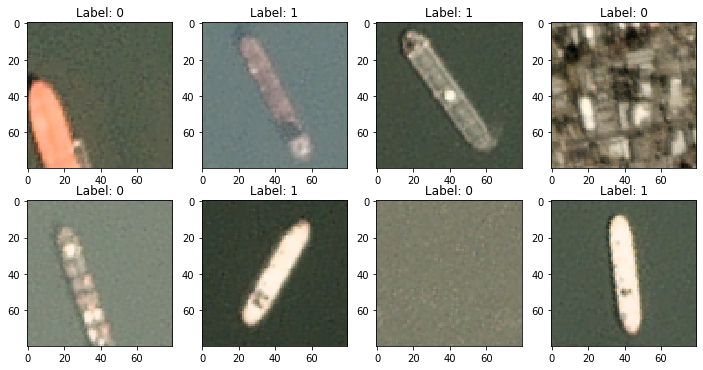

In [101]:
# randomly sample for showing images
ix = [int(x) for x in (np.random.random_sample(size=8)*2800)]

fig=plt.figure(figsize=(12,6))
for i, val in enumerate(ix):
    img = image_data[val]
    fig.add_subplot(2,4, i+1)
    plt.imshow(img)
    plt.title('Label: '+ labels[val])
plt.show()

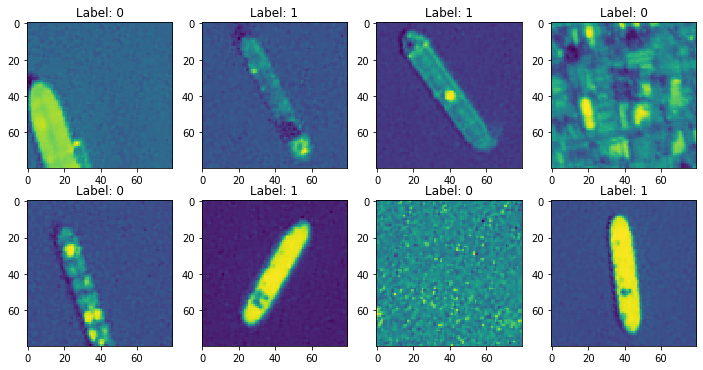

In [102]:
data_gray = [ color.rgb2gray(i) for i in image_data]

fig=plt.figure(figsize=(12,6))
for i, val in enumerate(ix):
    img = data_gray[val]
    fig.add_subplot(2,4, i+1)
    plt.imshow(img)
    plt.title('Label: '+ labels[val])
plt.show()

## Generate HOG Features

In [96]:
ppc = 8
cpb = 4
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(cpb,cpb),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

Size of HOG Feature for each image  (6272,)


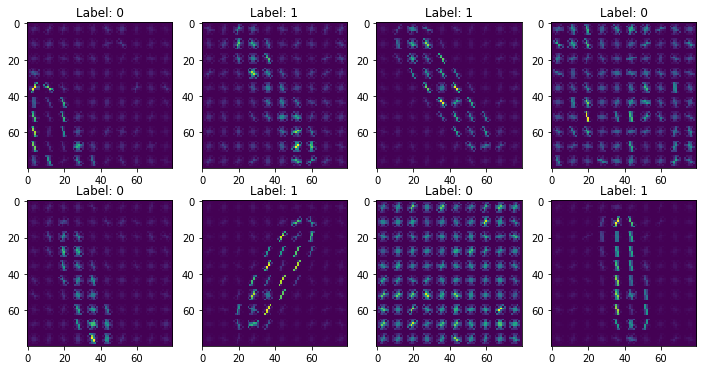

In [106]:
print('Size of HOG Feature for each image ', hog_features[0].shape)

fig=plt.figure(figsize=(12,6))
for i, val in enumerate(ix):
    img = hog_images[val]
    fig.add_subplot(2,4, i+1)
    plt.imshow(img)
    plt.title('Label: '+ labels[val])
plt.show()

## USE SVC on HOG Features for classification

In [112]:

labels = labels.reshape(-1, 1)

clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)

# Set aside 20% of data for test
percentage = 80
partition = int(len(hog_features)*percentage/100)

x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [113]:
y_pred = clf.predict(x_test)
print("Accuracy: ",(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy:  0.9071428571428571


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       434
           1       1.00      0.59      0.74       126

    accuracy                           0.91       560
   macro avg       0.95      0.79      0.84       560
weighted avg       0.92      0.91      0.90       560

